In [1]:
# this script was written by Michael Schmidt

In [2]:
import pandas as pd
import glob

In [7]:
# read every log file
# used code from https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
path = '.' # use your path
all_files = glob.glob(path + "/*.csv")

li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col = None, header = 0)
    li.append(df)

df_allData = pd.concat(li, axis=0, ignore_index = True)
display(df_allData)
#df_allData.to_csv("all_resuls.csv")

,id,event,time(ms),content,mode
0,2,keyPressed,0,16777220,0
1,2,keyPressed,615,16777248,0
2,2,keyPressed,81,84,0
3,2,keyPressed,34,72,0
4,2,keyPressed,97,69,0
...,...,...,...,...,...
420,1,keyPressed,72,89,0
421,1,keyPressed,432,46,0
422,1,wordTyped,1536,quickly,0
423,1,sentenceTyped,8511,The five boxing wizards jump very quickly.,0


In [29]:
# prepare data 
df_word_typed_duration = df_allData[df_allData['event'] == "wordTyped"]
df_sentence_typed_duration = df_allData[df_allData['event'] == "sentenceTyped"]
display(df_sentence_typed_duration)
df_deletion_key_strokes = df_allData[df_allData['content'] == "16777219"]
# get number of backstrokes

,id,event,time(ms),content,mode
63,2,sentenceTyped,10012,The five boxing wizards jump very quickly.,0
108,1,sentenceTyped,10753,he five boxing wizards jump very quickly.,1
160,3,sentenceTyped,10557,he five boxing wizards jump very quickly.,1
201,2,sentenceTyped,8549,he five boxing wizards jump very quickly.,1
256,4,sentenceTyped,6349,The five boxing wizards jump very quickly.,0
333,3,sentenceTyped,12336,The five boxing wizards jump very quickly.,0
368,4,sentenceTyped,7323,he five boxing wizards jump very quickly.,1
423,1,sentenceTyped,8511,The five boxing wizards jump very quickly.,0


In [4]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sms
from scipy.stats import ttest_ind

<BarContainer object of 1 artists>

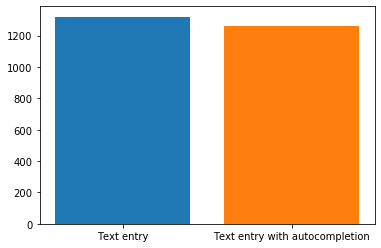

In [27]:
plt.bar("Text entry", df_word_typed_duration[df_word_typed_duration['mode'] == 0]['time(ms)'].mean())
plt.bar("Text entry with autocompletion", df_word_typed_duration[df_word_typed_duration['mode'] == 1]['time(ms)'].mean())

<BarContainer object of 1 artists>

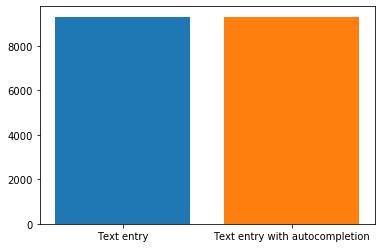

In [28]:
plt.bar("Text entry", df_sentence_typed_duration[df_sentence_typed_duration['mode'] == 0]['time(ms)'].mean())
plt.bar("Text entry with autocompletion", df_sentence_typed_duration[df_sentence_typed_duration['mode'] == 1]['time(ms)'].mean())

<BarContainer object of 5 artists>

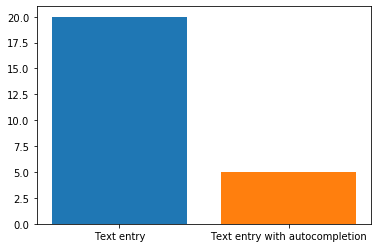

In [42]:
plt.bar("Text entry", df_deletion_key_strokes[df_deletion_key_strokes['mode'] == 0].count())
plt.bar("Text entry with autocompletion", df_deletion_key_strokes[df_deletion_key_strokes['mode'] == 1].count())    